In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

ROOT_DIR = 'drive/MyDrive/Study/02.기계학습기초'
CUSTOMER_DIR = os.path.join(ROOT_DIR, 'Customers.csv')
TRANSATION_DIR = os.path.join(ROOT_DIR, 'Transactions.csv')

In [3]:
import pandas as pd

df_customer = pd.read_csv(CUSTOMER_DIR)
df_transaction = pd.read_csv(TRANSATION_DIR)

# EDA

## df_customer fields
* Datetime
  - birth
* Categorical  
  - sex
  - birth_flg
  - mrg_flg
  - h_type1
  - h_type2
  - hobby
  - job_stype
  - cus_stype
  - m_time1

## df_transaction fields
* Datetime
  - sales_date
* Categorical
  - goodcd
  - brd_nm
  - team_nm
  - part_nm 
  - corner_nm

* Numeric
  - tot_amt
  - dis_amt
  - net_amt

In [4]:
df_customer.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1
0,1,0,$null$,-1,1,A,1,17,4110,7,37
1,2,0,$null$,-1,1,N,1,17,7060,7,31
2,3,0,$null$,-1,1,A,2,17,4070,6,22
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1


In [5]:
df_transaction.head()

,sales_date,custid,goodcd,brd_nm,team_nm,part_nm,pc_nm,corner_nm,tot_amt,dis_amt,net_amt
0,2000-05-01 00:00:00,7595,2700000000000,식품,식품팀,공산품,일반식품,주류,28000,0,28000
1,2000-05-01 00:00:00,36860,2700000000000,식품,식품팀,공산품파트,일반식품,차류,59700,0,59700
2,2000-05-01 00:00:00,48385,4125270007985,슈프리미아,잡화가용팀,잡화파트,장신구,화장잡화,17000,0,17000
3,2000-05-01 00:00:00,29611,4508720043900,삼운/브로니,잡화가용팀,가정용품,식기,욕실용품,14000,700,13300
4,2000-05-01 00:00:00,16457,4120441805900,베네통토탈,의류패션팀,영플라자,소품,피혁토탈(B2),5800,290,5510


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   custid     49995 non-null  int64 
 1   sex        49995 non-null  int64 
 2   birth      49995 non-null  object
 3   birth_flg  49995 non-null  int64 
 4   mrg_flg    49995 non-null  int64 
 5   h_type1    49995 non-null  object
 6   h_type2    49995 non-null  int64 
 7   hobby      49995 non-null  int64 
 8   job_stype  49995 non-null  int64 
 9   cus_stype  49995 non-null  int64 
 10  m_time1    49995 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.2+ MB


In [7]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726430 entries, 0 to 1726429
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   sales_date  object
 1   custid      int64 
 2   goodcd      int64 
 3   brd_nm      object
 4   team_nm     object
 5   part_nm     object
 6   pc_nm       object
 7   corner_nm   object
 8   tot_amt     int64 
 9   dis_amt     int64 
 10  net_amt     int64 
dtypes: int64(5), object(6)
memory usage: 144.9+ MB


In [8]:
df_customer.describe()

,custid,sex,birth_flg,mrg_flg,h_type2,hobby,job_stype,cus_stype,m_time1
count,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000
mean,25002.445045,1.695770,0.988419,1.261886,2.753195,13.932333,4926.448185,8.072787,30.032903
std,14433.278091,0.461128,0.961081,0.618456,1.585060,5.762665,1982.486631,2.845954,8.692864
min,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000
25%,12504.500000,1.000000,1.000000,1.000000,1.000000,17.000000,3050.000000,7.000000,27.000000
50%,25003.000000,2.000000,1.000000,1.000000,3.000000,17.000000,4660.000000,9.000000,32.000000
75%,37501.500000,2.000000,2.000000,2.000000,4.000000,17.000000,7060.000000,10.000000,36.000000
max,50000.000000,2.000000,2.000000,7.000000,8.000000,17.000000,8201.000000,12.000000,42.000000


In [9]:
df_transaction.describe()

,custid,goodcd,tot_amt,dis_amt,net_amt
count,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06
mean,2.855553e+04,3.916395e+12,9.866935e+04,3.353621e+03,9.531573e+04
std,1.364135e+04,9.259838e+11,3.152561e+05,1.563967e+04,3.048729e+05
min,1.000000e+00,2.101013e+12,-7.200000e+07,-1.479000e+06,-7.200000e+07
25%,1.803200e+04,2.700000e+12,2.243200e+04,0.000000e+00,2.200000e+04
50%,3.022800e+04,4.202163e+12,5.200000e+04,0.000000e+00,5.044000e+04
75%,4.010800e+04,4.404830e+12,1.192000e+05,3.650000e+03,1.155000e+05
max,5.000000e+04,8.801192e+12,7.200000e+07,2.301440e+06,7.200000e+07


# Data cleansing

## df_transaction

In [10]:
l = ['brd_nm', 'team_nm', 'part_nm', 'pc_nm', 'corner_nm']
for e in l:
  print('\n', e)
  print(set(df_transaction[e].to_list()))


 brd_nm
{'GR', '바바라', '휴먼앤휴먼', '홈데코', '아베끄부', 'ON&ON', '챔피언', '서경닷컴', '겐조', '세치니', '포시즌', '옹골진', '엘르수영복', '이은희', '마발라네일', '라찌니', '거산/제디', '뉴원/로젠탈', '오즈모시즈', '태창비디오', '아레나수영복용품', '이솝', '손정완', '이상봉', '예작', '한스포라로이드외선글라스', '삼덕카페트', '현대카메라', '쇼매수입ACC', '미라스', '런던포그(정)', '접착시트', '비꼴리끄', '베이비헤로스직배', '지오다노쥬니어', '하라', '옴스', '피터지슨', '알프레도베르사체', '트레아미찌', '입생로랑', '페레머플러천호', '갤럭시(캐)', 'GE', '쏠레지아', '넥서스', '알타모다', '로얄', '네일엘레강스써비스', '쁘렝땅', '아베스포츠', '런던포그행', '오진/코렐', '현대골프특정', '지방시화장품', 'N2', '벨라모', '금사랑준보석', '데시데', '핀토이', '끌레몽트', '소르젠테', '벨리스모D&G수입', '벧엘통상', '피에르가르뎅행', '서경물산', '네일엘레강스', '대도합성수지', '미키클럽(행', '톰키드', '세원수입페레스튜디오외', '카스', '리복의류', '에퀴/르노/부가티', 'VAN', '오휘', '발리', '모닝글로리', '팝키드', '트로아', '디엠', '카운테스마라(캐)', '삼익악기', '인난찌', '아이삭', '랑케스타', '다실바', '월비스타킹', '보영', '휠라키즈', '신한/주방', '웅가로', '이브무역1', '지엔알모다1', '앙띰', '오레노', '해피랜드', '이태리', '대흥', '모라도', '빈폴레이디스', '디자인젬', '세원불가리외선글라스', '후부', '씨앤에이치', '자루디', '쁘띠앙팡', '솔트', '벨라디터치', '알씨알', '루치아노최', '쉬즈미스', '발렌타인넥타이', '루카스가방', '테팔', '쟝폴클라쎄', '노송가구', '고운공예', 

In [11]:
df_transaction_cust = df_transaction[['custid', 'part_nm', 'net_amt']]
df_transaction_cust

,custid,part_nm,net_amt
0,7595,공산품,28000
1,36860,공산품파트,59700
2,48385,잡화파트,17000
3,29611,가정용품,13300
4,16457,영플라자,5510
...,...,...,...
1726425,22903,영플라자,27300
1726426,32832,"아동,스포츠",136800
1726427,18628,공산품,8340
1726428,38077,생식품,23170


In [12]:
contents = {part: list() for part in set(df_transaction_cust.part_nm.to_list())}
contents_key = contents.keys()
for custid in set(df_transaction_cust.custid.to_list()):
  parts = df_transaction_cust[df_transaction_cust.custid==custid].part_nm.to_list()
  for content in contents_key:
    if content == 'custid':
      continue
    contents[content].append(parts.count(content))
  contents.setdefault('custid', list()).append(custid)
df_transaction_cust = pd.DataFrame(contents)

In [13]:
df_transaction_cust.head()

,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,custid
0,0,0,3,0,0,19,0,11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,1
1,0,0,10,0,0,1,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,2
2,1,0,0,43,0,0,0,1,0,0,4,0,0,0,4,0,0,0,0,2,0,0,0,2,5,4,0,0,2,0,0,3
3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,5


In [14]:
df_transaction_cust

,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,custid
0,0,0,3,0,0,19,0,11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,1
1,0,0,10,0,0,1,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,2
2,1,0,0,43,0,0,0,1,0,0,4,0,0,0,4,0,0,0,0,2,0,0,0,2,5,4,0,0,2,0,0,3
3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,15,0,0,0,26,0,9,5,92,21,0,0,0,0,0,0,49996
49991,0,0,8,0,0,3,0,0,0,0,1,0,0,0,15,0,4,0,0,0,0,0,0,0,0,0,0,0,0,13,2,49997
49992,0,9,1,0,5,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,3,12,1,0,1,2,0,0,0,49998
49993,0,6,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,5,0,0,0,6,2,0,2,0,0,0,0,49999


In [15]:
df_customer_transaction = df_customer.merge(df_transaction_cust, on='custid')

In [16]:
df_customer_transaction

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트
0,1,0,$null$,-1,1,A,1,17,4110,7,37,0,0,3,0,0,19,0,11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20
1,2,0,$null$,-1,1,N,1,17,7060,7,31,0,0,10,0,0,1,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3
2,3,0,$null$,-1,1,A,2,17,4070,6,22,1,0,0,43,0,0,0,1,0,0,4,0,0,0,4,0,0,0,0,2,0,0,0,2,5,4,0,0,2,0,0
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,49996,0,1911-08-13 00:00:00,2,1,N,1,17,4500,1,30,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,15,0,0,0,26,0,9,5,92,21,0,0,0,0,0,0
49991,49997,1,1911-01-10 00:00:00,1,1,V,1,17,7060,3,30,0,0,8,0,0,3,0,0,0,0,1,0,0,0,15,0,4,0,0,0,0,0,0,0,0,0,0,0,0,13,2
49992,49998,1,1970-09-28 00:00:00,1,1,Z,3,17,3070,6,34,0,9,1,0,5,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,3,12,1,0,1,2,0,0,0
49993,49999,0,1943-02-28 00:00:00,1,1,A,4,2,1490,10,-1,0,6,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,5,0,0,0,6,2,0,2,0,0,0,0


## df_customer

### Drop NaN

In [17]:
df_customer_transaction.dropna(axis=0, inplace=True)

### Drop null

In [18]:
df_customer_transaction.columns

Index(['custid', 'sex', 'birth', 'birth_flg', 'mrg_flg', 'h_type1', 'h_type2',
       'hobby', 'job_stype', 'cus_stype', 'm_time1', '골프/유니캐쥬얼', '잡화',
       '남성정장스포츠', '아동,스포츠', '여성캐쥬얼', '생식품파트', '스포츠캐주얼', '가정용품파트', '아동', '로얄부틱',
       '로얄부띠끄', '상품개발영업1과', '인터넷백화점', '영캐릭터', '잡화파트', '아동문화', '여성의류파트',
       '스포츠캐쥬얼', '영라이브', '생식품', '영플라자', '패션잡화', '남성의류', '공산품', '가정용품', '명품잡화',
       '여성정장', '영어덜트캐쥬얼', '여성캐주얼', '케주얼,구두,아동', '공산품파트'],
      dtype='object')

In [19]:
drop_indexes = [df_customer_transaction[df_customer_transaction[col]=='$null$'].index for col in df_customer.columns]

In [20]:
for drop_index in drop_indexes:
  df_customer_transaction.drop(index=drop_index, axis=0, inplace=True)
df_customer_transaction.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
5,6,2,1981-11-12 00:00:00,1,2,N,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0
6,7,2,1981-10-17 00:00:00,1,2,N,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0
7,8,2,1981-06-25 00:00:00,1,2,V,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0


### Drop outlier

In [ ]:
# df_customer.iloc[drop_idx]

In [22]:
is_outlier = df_customer_transaction.birth.map(lambda b: int(b[:4]) > 2021)
drop_idx = is_outlier[is_outlier == True].index
df_customer_transaction.drop(index=drop_idx, axis=0, inplace=True)
df_customer_transaction.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트
3,4,2,1982-09-07 00:00:00,1,2,N,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,5,2,1982-08-17 00:00:00,1,2,Z,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
5,6,2,1981-11-12 00:00:00,1,2,N,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0
6,7,2,1981-10-17 00:00:00,1,2,N,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0
7,8,2,1981-06-25 00:00:00,1,2,V,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0


### Split birth datetime

In [23]:
# Convert datetime column to each elements (year, month, day, dayofweek, hour)
df_customer_transaction['birth'] = pd.to_datetime(df_customer_transaction['birth'])
df_customer_transaction.head()

,custid,sex,birth,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트
3,4,2,1982-09-07,1,2,N,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,5,2,1982-08-17,1,2,Z,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
5,6,2,1981-11-12,1,2,N,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0
6,7,2,1981-10-17,1,2,N,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0
7,8,2,1981-06-25,1,2,V,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0


In [24]:
def split_datetime(df):
    df['year'] = df['birth'].apply(lambda t: t.year)
    df['month'] = df['birth'].apply(lambda t: t.month)
    df['day'] = df['birth'].apply(lambda t: t.day)
    df = df.drop(['birth'], axis=1)
    return df

In [25]:
df_customer_transaction = split_datetime(df_customer_transaction)

In [26]:
df_customer_transaction.head()

,custid,sex,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,year,month,day
3,4,2,1,2,N,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1982,9,7
4,5,2,1,2,Z,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1982,8,17
5,6,2,1,2,N,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0,1981,11,12
6,7,2,1,2,N,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0,1981,10,17
7,8,2,1,2,V,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0,1981,6,25


### Label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

def categorical_encoding(df, col):
  print(f'\n{col}')
  encoder = LabelEncoder()
  encoder.fit(df[col])
  labels = encoder.transform(df[col])
  print(labels)
  print(encoder.classes_)
  return labels

In [28]:
col = 'h_type1'
df_customer_transaction[col] = categorical_encoding(df_customer_transaction, col)
df_customer_transaction.head()


h_type1
[3 6 3 ... 4 6 0]
['A' 'B' 'H' 'N' 'V' 'X' 'Z']


,custid,sex,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,year,month,day
3,4,2,1,2,3,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1982,9,7
4,5,2,1,2,6,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1982,8,17
5,6,2,1,2,3,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0,1981,11,12
6,7,2,1,2,3,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0,1981,10,17
7,8,2,1,2,4,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0,1981,6,25


### Map mrg_flg to 1 and 0

In [29]:
df_customer_transaction.mrg_flg

3        2
4        2
5        2
6        2
7        2
        ..
49989    2
49990    1
49991    1
49992    1
49993    1
Name: mrg_flg, Length: 42152, dtype: int64

In [30]:
df_customer_transaction['mrg_flg'] = df_customer_transaction.mrg_flg.map(lambda m: 1 if m==1 else 0) 

In [31]:
df_customer_transaction.head()

,custid,sex,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,year,month,day
3,4,2,1,0,3,4,11,4520,9,35,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1982,9,7
4,5,2,1,0,6,3,17,4520,9,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1982,8,17
5,6,2,1,0,3,3,17,7060,9,38,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,12,0,0,0,0,0,0,1,0,0,0,1,0,1981,11,12
6,7,2,1,0,3,3,17,1120,9,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,1,0,0,0,2,0,0,1981,10,17
7,8,2,1,0,4,3,17,4520,3,40,0,1,0,0,0,0,11,0,0,0,0,0,0,8,0,0,0,0,1,12,46,85,7,71,1,0,0,0,0,0,0,1981,6,25


# Visulaize

## df_customer

In [32]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

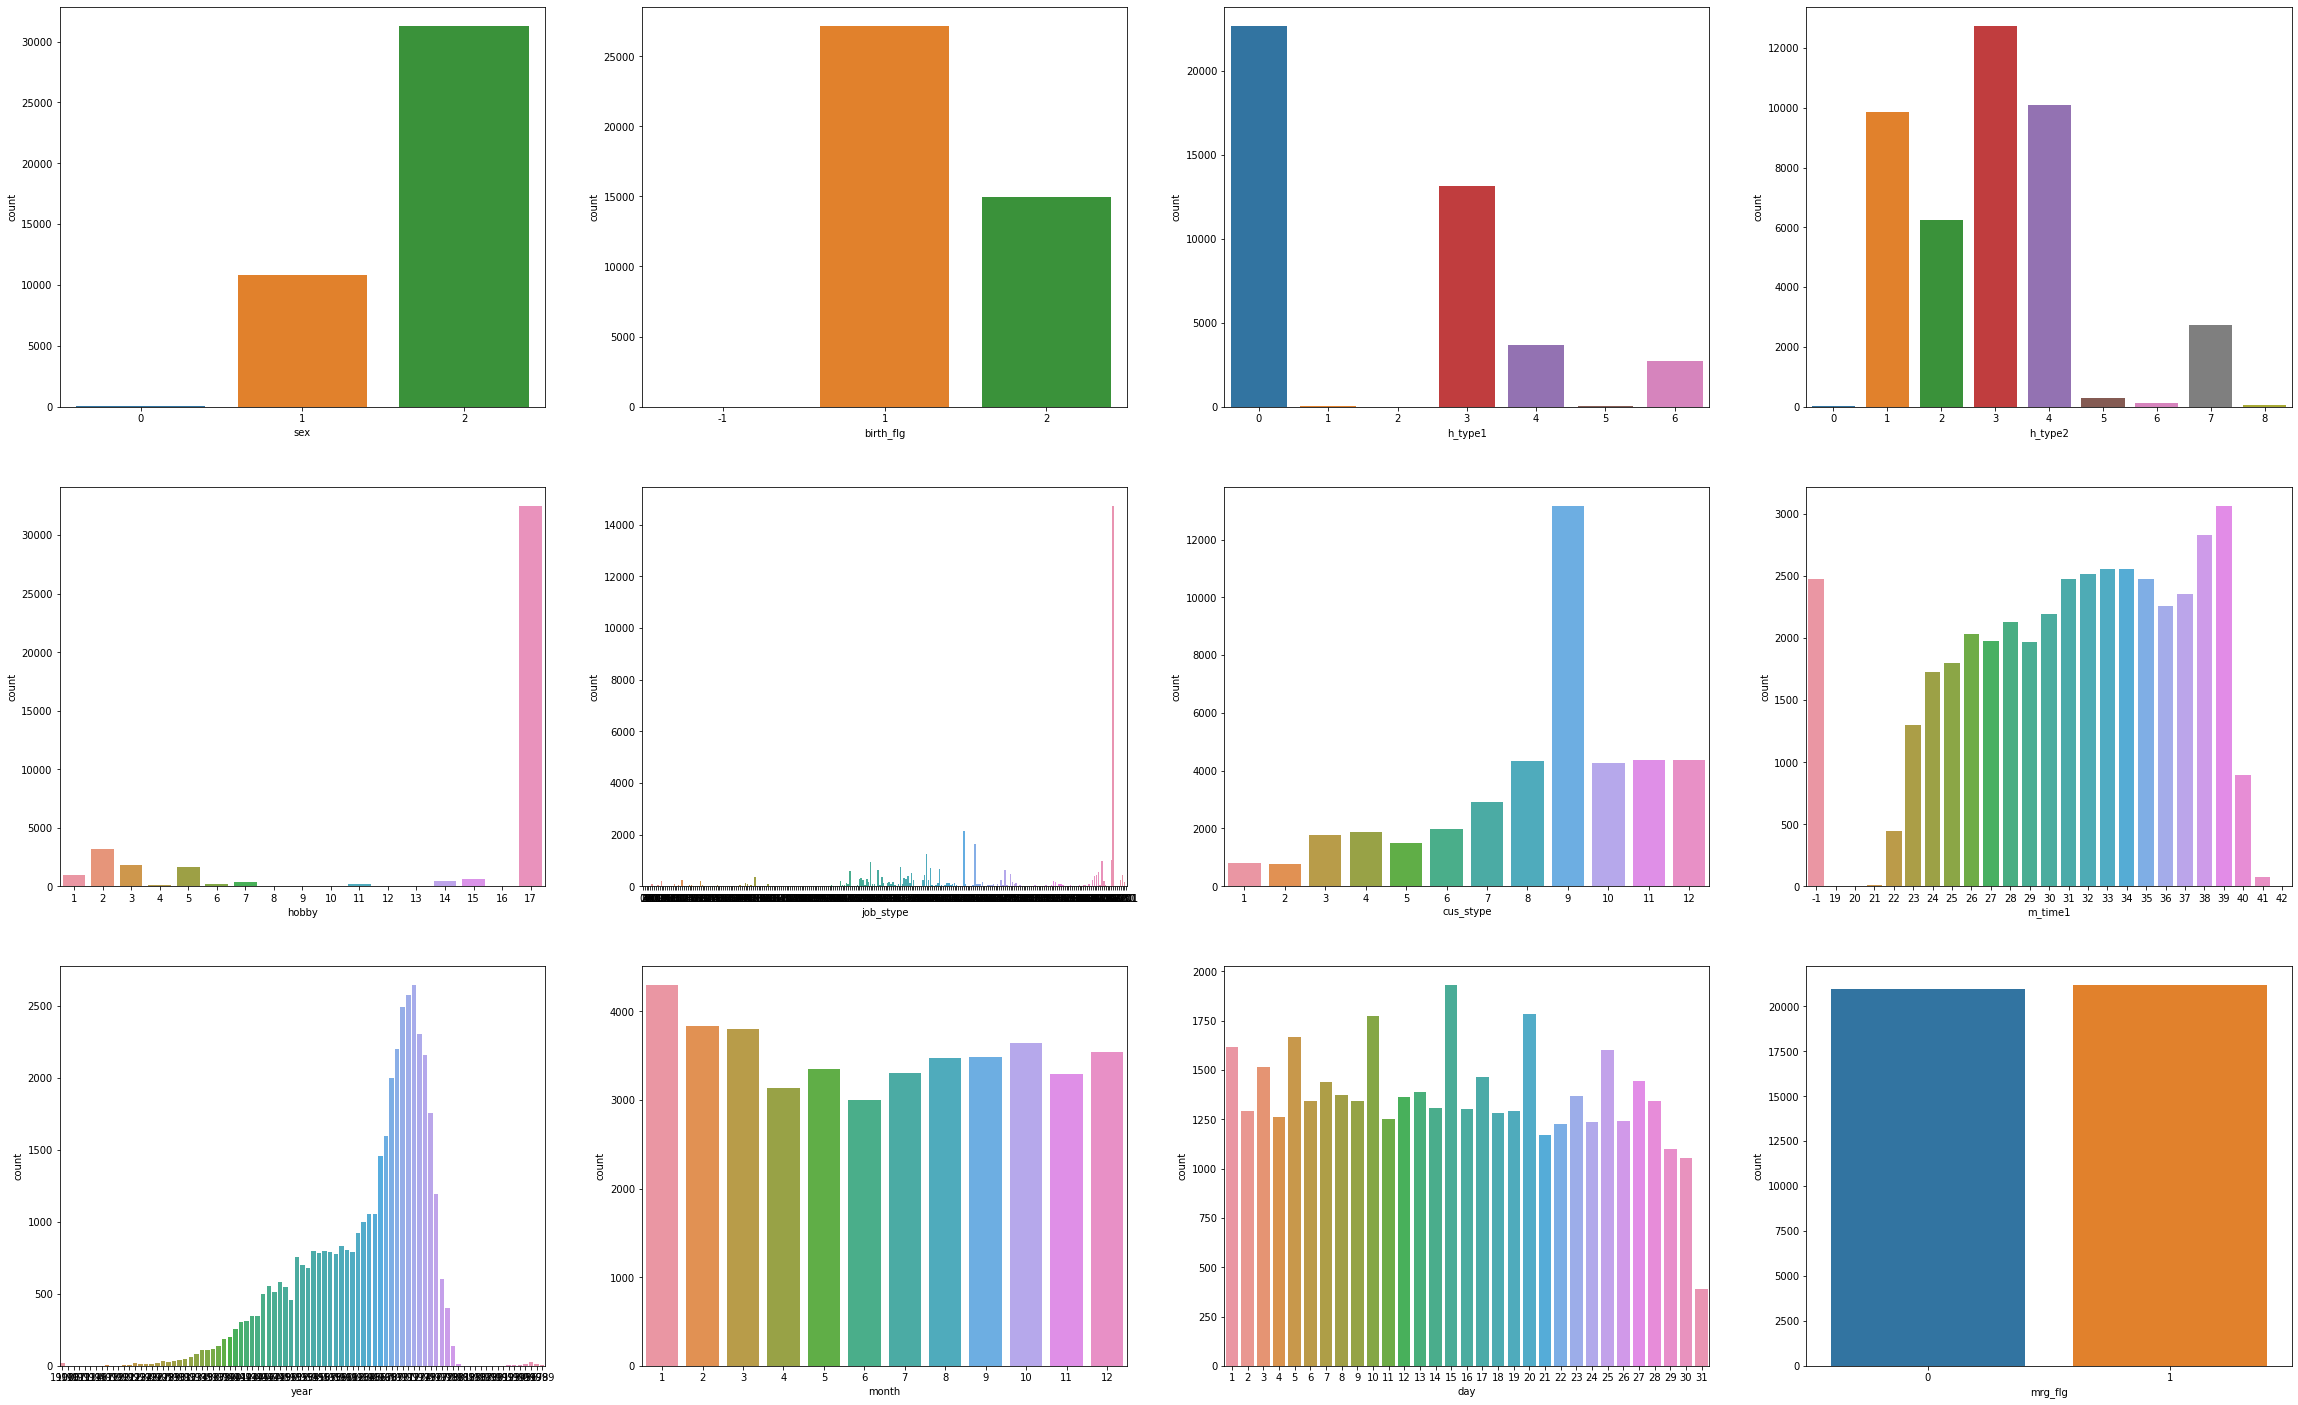

In [33]:
fig, axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(40, 25)
columns = [['sex', 'birth_flg', 'h_type1', 'h_type2'], 
           ['hobby', 'job_stype', 'cus_stype', 'm_time1'],
           ['year', 'month', 'day', 'mrg_flg']]  # birth ('year', 'month', 'day')
for i in range(len(columns)):
  for j in range(len(columns[i])):
    sns.countplot(data=df_customer_transaction, x=columns[i][j], ax=axes[i][j])

In [34]:
# 각 해별로 기혼 + 미혼
std_df = df_customer_transaction.year.reset_index().groupby('year').count().reset_index().rename({'index': 'count'}, axis=1)
std_df

,year,count
0,1900,19
1,1906,1
2,1907,1
3,1911,2
4,1913,1
...,...,...
82,1995,6
83,1996,12
84,1997,28
85,1998,13


In [35]:
# 각 해별로 기혼
new_df = df_customer_transaction.groupby(['year', 'mrg_flg']).count().reset_index()[['year', 'mrg_flg', 'sex']]
new_df = new_df[new_df.mrg_flg==1].drop('mrg_flg', axis=1).rename({'sex': 'count'}, axis=1)
new_df

,year,count
1,1900,12
2,1906,1
3,1907,1
4,1911,2
5,1913,1
...,...,...
144,1995,3
146,1996,9
148,1997,7
150,1998,2


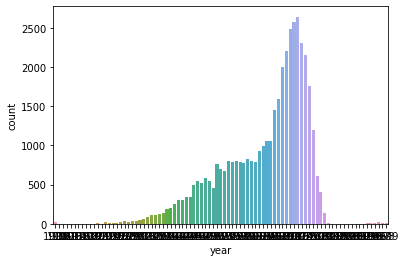

In [36]:
sns.barplot(data=std_df, x='year', y='count')

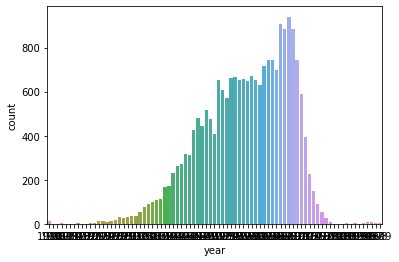

In [37]:
sns.barplot(data=new_df, x='year', y='count')

In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

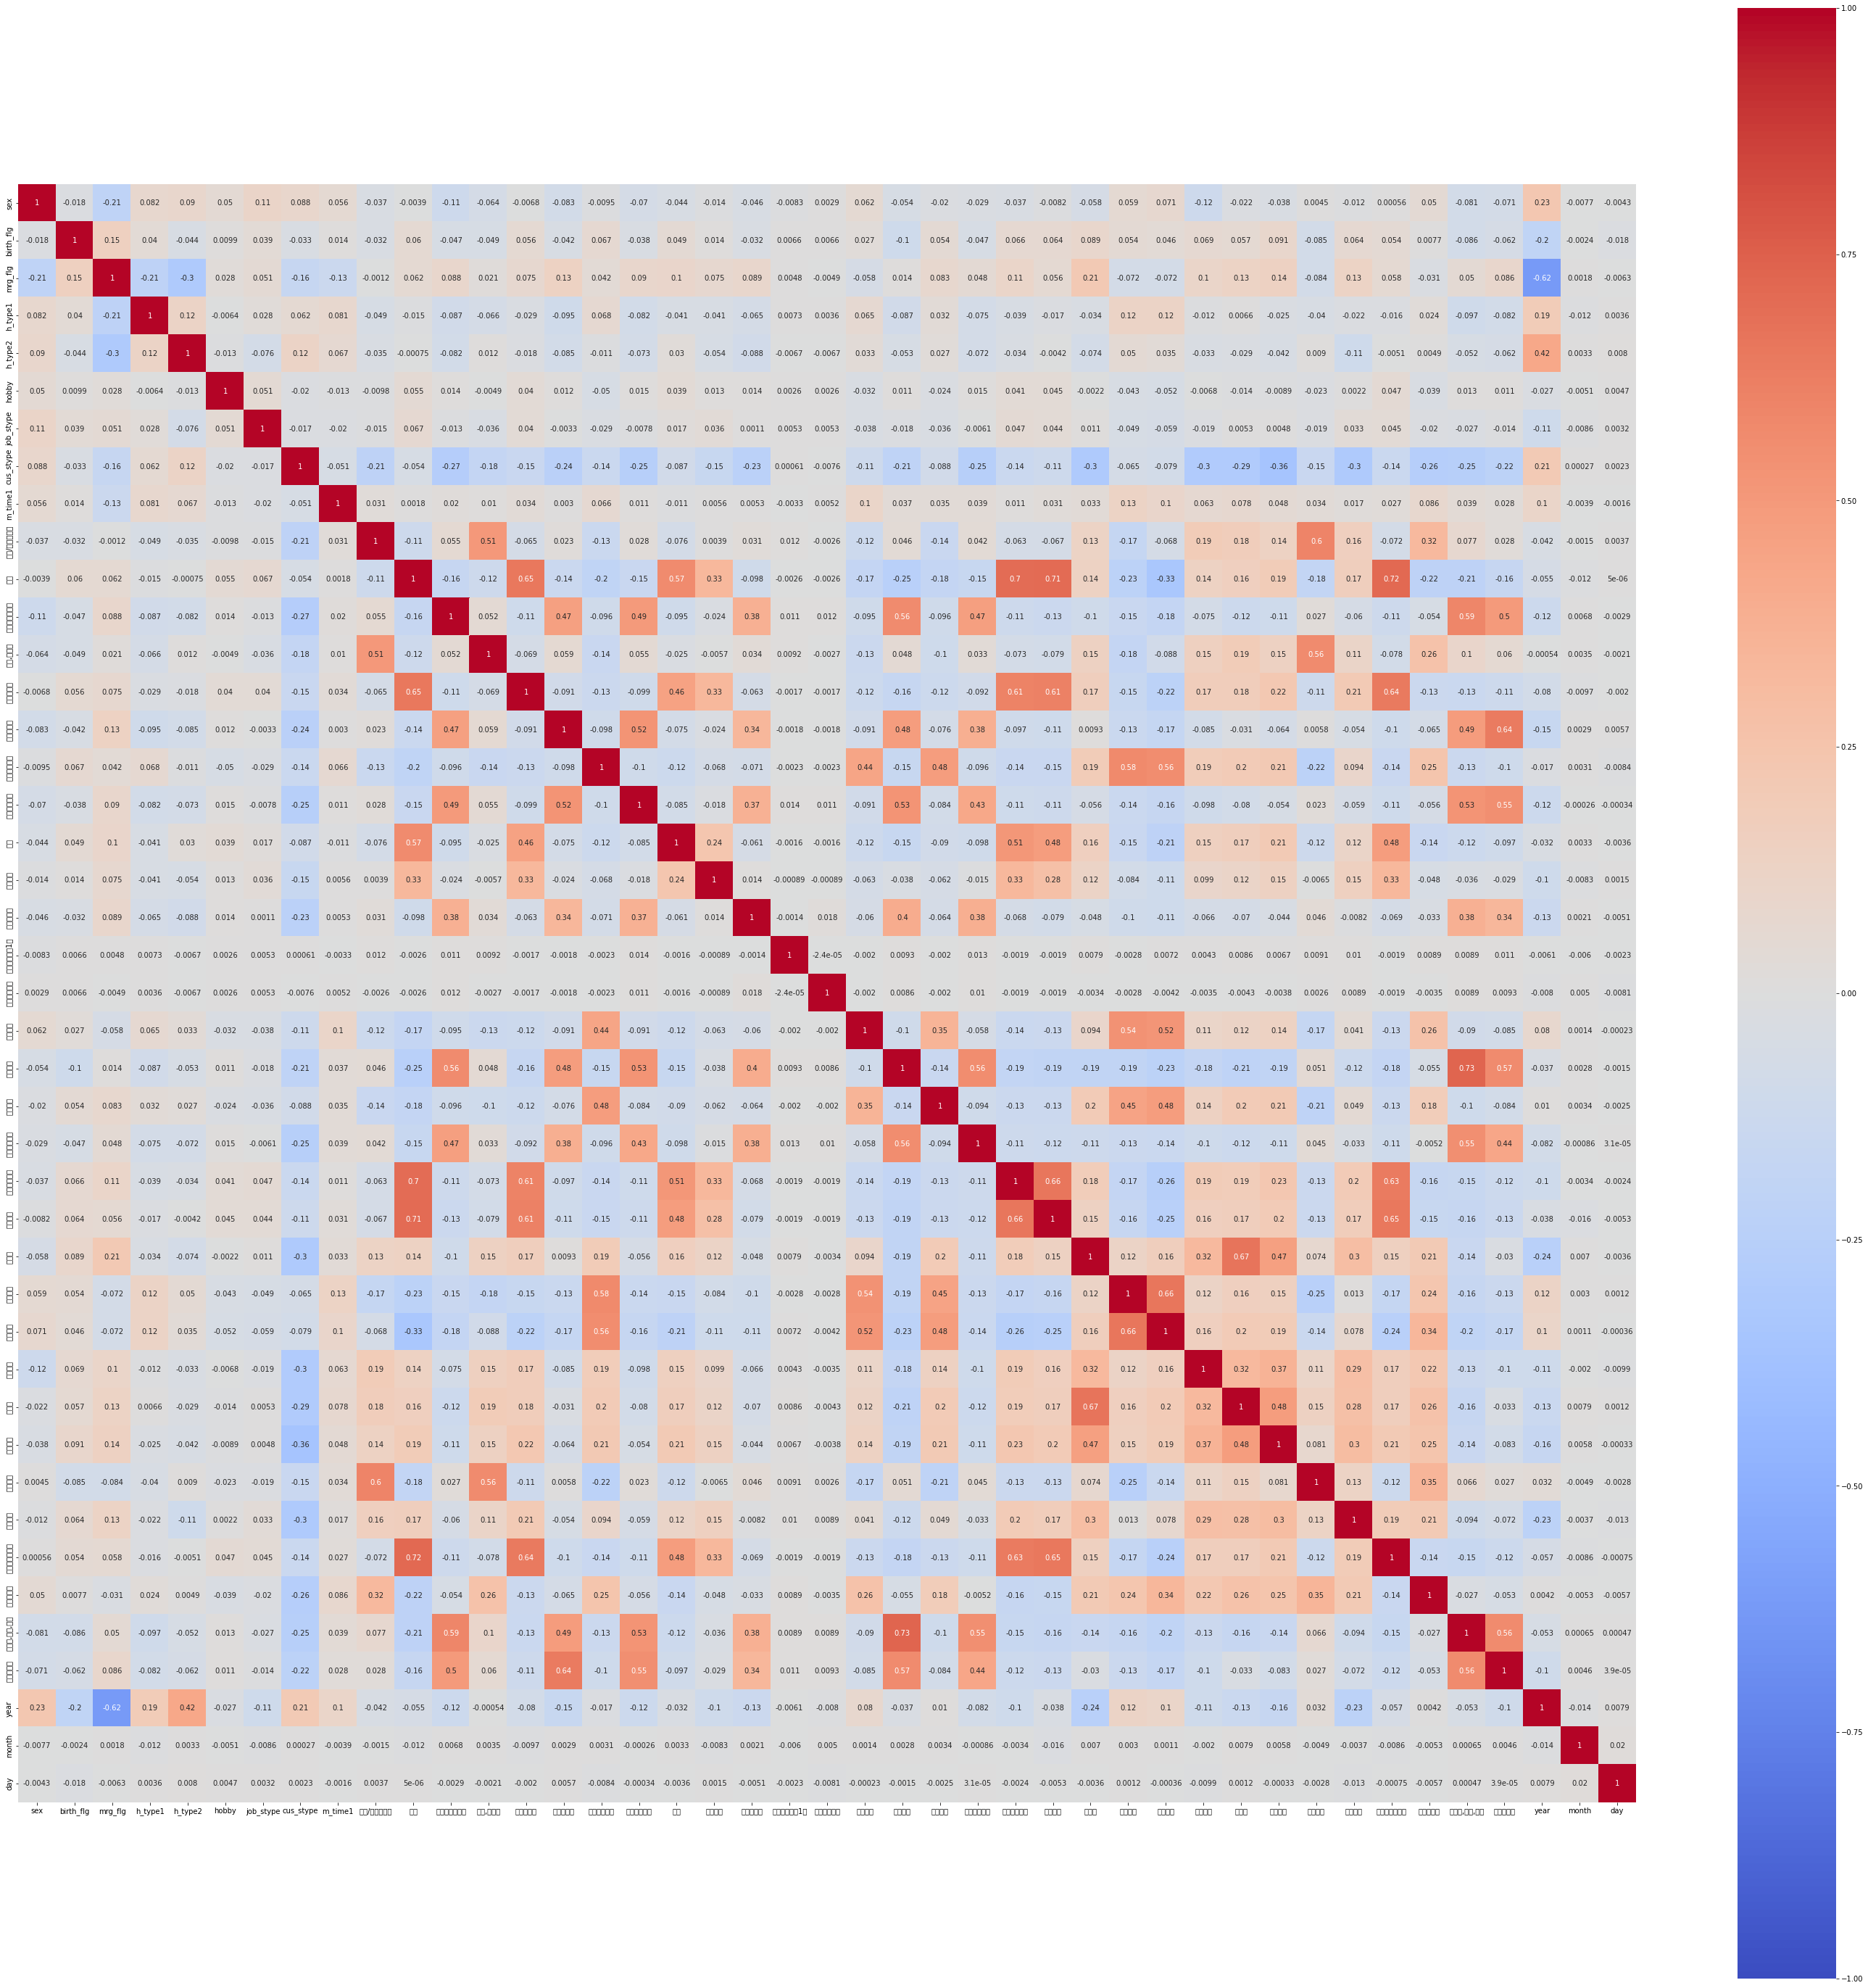

In [39]:
# Correlation between each features
plt.figure(figsize=(50,50))
sns.heatmap(df_customer_transaction.drop('custid', axis=1).corr("spearman"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

In [40]:
df_customer_transaction.drop('custid', axis=1).corr("pearson")

,sex,birth_flg,mrg_flg,h_type1,h_type2,hobby,job_stype,cus_stype,m_time1,골프/유니캐쥬얼,잡화,남성정장스포츠,"아동,스포츠",여성캐쥬얼,생식품파트,스포츠캐주얼,가정용품파트,아동,로얄부틱,로얄부띠끄,상품개발영업1과,인터넷백화점,영캐릭터,잡화파트,아동문화,여성의류파트,스포츠캐쥬얼,영라이브,생식품,영플라자,패션잡화,남성의류,공산품,가정용품,명품잡화,여성정장,영어덜트캐쥬얼,여성캐주얼,"케주얼,구두,아동",공산품파트,year,month,day
sex,1.000000,-0.017365,-0.206250,0.079702,0.090515,0.058542,0.127081,0.100381,0.010690,-0.033607,0.001339,-0.091361,-0.068056,-0.005275,-0.052709,-0.033635,-0.057537,-0.046034,-0.008601,-0.028051,-0.008237,0.002866,0.032146,-0.039475,-0.035525,-0.021708,-0.034568,-0.007682,-0.041160,0.031669,0.039775,-0.098336,-0.034373,-0.039403,0.014903,-0.008846,0.001843,0.024728,-0.088640,-0.050697,0.186290,-0.007883,-0.004054
birth_flg,-0.017365,1.000000,0.151685,0.038347,-0.040304,0.001144,0.043651,-0.041740,0.034348,0.005758,0.045448,-0.011088,-0.019354,0.056569,-0.015991,0.073095,-0.019001,0.031835,0.007515,-0.017034,0.006552,0.006552,0.025191,-0.051851,0.044159,-0.018395,0.063735,0.053751,0.056349,0.055613,0.054398,0.064592,0.044961,0.079043,-0.029524,0.050830,0.047657,0.019488,-0.032193,-0.022266,-0.158647,-0.002259,-0.018776
mrg_flg,-0.206250,0.151685,1.000000,-0.210592,-0.293023,0.019571,0.054215,-0.184191,-0.012682,0.045681,0.039969,0.095317,0.063596,0.062822,0.096110,0.080477,0.085038,0.077260,0.044582,0.060344,0.004848,-0.004894,-0.031467,0.036346,0.103664,0.049547,0.104191,0.050159,0.152603,-0.031806,-0.026763,0.097438,0.118733,0.129496,-0.038301,0.104559,0.040052,-0.001631,0.083542,0.084667,-0.549249,0.001923,-0.006443
h_type1,0.079702,0.038347,-0.210592,1.000000,0.112165,-0.003080,0.031286,0.071601,0.026485,-0.045081,-0.006080,-0.064557,-0.054830,-0.023856,-0.064155,0.036294,-0.063937,-0.033644,-0.026712,-0.029456,0.005882,0.003361,0.042569,-0.052009,-0.000728,-0.042318,-0.040496,-0.011301,-0.017932,0.080737,0.082181,-0.013489,0.006642,-0.036085,-0.019055,-0.015264,-0.010071,0.005436,-0.081064,-0.064187,0.146814,-0.011580,0.002403
h_type2,0.090515,-0.040304,-0.293023,0.112165,1.000000,-0.001517,-0.057546,0.122492,0.005081,-0.046724,0.002127,-0.071529,-0.001643,-0.020799,-0.058476,-0.039246,-0.062389,0.016398,-0.034456,-0.052836,-0.005954,-0.005954,0.002589,-0.049925,-0.003453,-0.053204,-0.043757,-0.012643,-0.064960,0.014859,0.006396,-0.038835,-0.038401,-0.046824,-0.005677,-0.080948,-0.000933,-0.008458,-0.044379,-0.047538,0.382659,0.001828,0.007085
hobby,0.058542,0.001144,0.019571,-0.003080,-0.001517,1.000000,0.060175,-0.010774,-0.016744,-0.004486,0.032934,0.007810,-0.000416,0.023243,0.016196,-0.042840,0.018623,0.016204,0.005376,0.011227,0.002482,0.002482,-0.021051,0.017455,-0.015801,0.020399,0.026887,0.028559,-0.005982,-0.028608,-0.042497,-0.009773,-0.009097,-0.007680,-0.012179,0.000001,0.031513,-0.028018,0.016634,0.008588,-0.017253,-0.005930,0.005975
job_stype,0.127081,0.043651,0.054215,0.031286,-0.057546,0.060175,1.000000,-0.001783,-0.008849,-0.024392,0.022655,-0.013867,-0.041828,0.021719,-0.004271,0.019374,-0.003342,-0.006273,0.017616,-0.003227,0.004949,0.004949,0.001173,-0.020312,-0.006845,-0.007980,0.024672,0.016662,0.010247,0.001669,-0.003463,-0.008312,0.002281,0.011954,-0.028213,0.027524,0.020807,-0.000855,-0.029923,-0.006524,-0.125567,-0.009421,0.001911
cus_stype,0.100381,-0.041740,-0.184191,0.071601,0.122492,-0.010774,-0.001783,1.000000,-0.078685,-0.262766,-0.178358,-0.286887,-0.225532,-0.187439,-0.211679,-0.194669,-0.271285,-0.124844,-0.132372,-0.221688,0.001208,-0.009733,-0.140372,-0.315514,-0.137173,-0.242022,-0.200879,-0.149477,-0.284629,-0.134602,-0.191758,-0.311276,-0.286183,-0.369924,-0.279678,-0.276699,-0.178084,-0.286230,-0.305848,-0.220895,0.215468,0.002515,0.001639
m_time1,0.010690,0.034348,-0.012682,0.026485,0.005081,-0.016744,-0.008849,-0.078685,1.000000,0.051170,0.056260,0.042422,0.031393,0.043938,0.024100,0.055418,0.033979,0.020682,0.018148,0.027374,-0.001049,0.003756,0.069870,0.069408,0.019133,0.046913,0.036771,0.049762,0.053629,0.104044,0.106416,0.084713,0.076185,0.071055,0.077132,0.043990,0.050667,0.089476,0.053445,0.034466,-0.

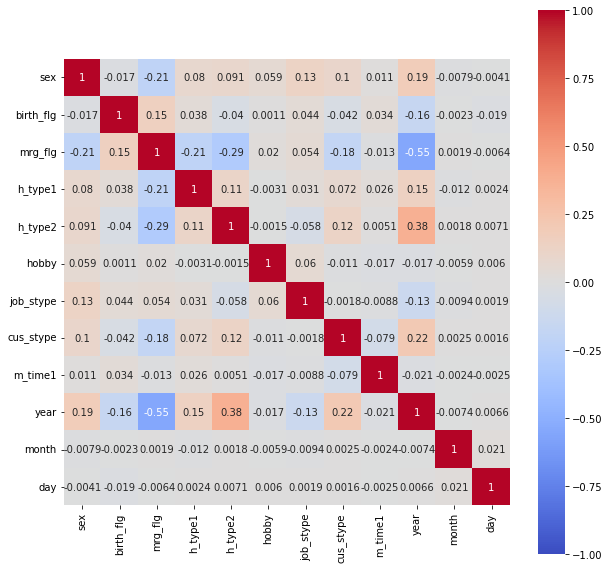

In [41]:
# Correlation between each features
plt.figure(figsize=(10,10))
sns.heatmap(df_customer_transaction[['sex', 'birth_flg', 'mrg_flg', 'h_type1', 'h_type2', 'hobby', 'job_stype', 'cus_stype', 'm_time1', 'year', 'month', 'day']].corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_customer_transaction.drop(['mrg_flg', 'custid'], axis=1).values, df_customer_transaction[['mrg_flg']].values, train_size=0.7)

## Modeling

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
def evaluate(clf_class, max_iter=None):
  """
  하나의 모델에 대한 평가
  """
  print('\n', clf_class)
  clf = clf_class()
  if max_iter:
    clf = clf_class(max_iter=max_iter)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  acc = accuracy_score(y_test, pred)
  pre = precision_score(y_test, pred)
  rec = recall_score(y_test, pred)
  print('accuracy : ', acc)
  print('precision : ', pre)
  print('recall : ', rec)
  return clf, acc

def inference(*clf_classes):
  """
  여러개의 모델 클래스를 입력받고 그중 가장 성능이 높은 모델 인턴스와 정확도 반환
  """
  clfs = list()
  for clf_class in clf_classes:
    max_iter = None
    if isinstance(clf_class, tuple):
      clf_class, max_iter = clf_class
    clf, acc = evaluate(clf_class, max_iter)
    clfs.append((clf, acc))
  clfs.sort(key=lambda e: e[1], reverse=True)
  return clfs[0]

In [45]:
clf, _ = inference(*[(LogisticRegression, 2000),
                       DecisionTreeClassifier,
                       GradientBoostingClassifier])


 <class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy :  0.7272655385102008
precision :  0.737013515714053
recall :  0.7116352201257862

 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
accuracy :  0.756523801992725
precision :  0.7532026547306683
recall :  0.7672955974842768

 <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy :  0.8450893563182034
precision :  0.8273092369477911
recall :  0.8745283018867924


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51564 missing from current font.
  font.set_

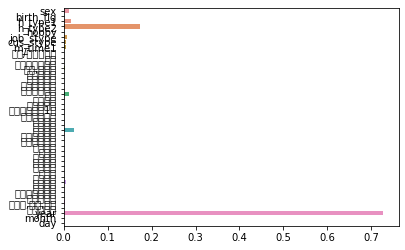

In [46]:
sns.barplot(x=clf.feature_importances_ , y=df_customer_transaction.drop(['custid', 'mrg_flg'], axis=1).columns)

In [47]:
df_customer_transaction.drop(['custid', 'mrg_flg'], axis=1).columns.to_list()

['sex',
 'birth_flg',
 'h_type1',
 'h_type2',
 'hobby',
 'job_stype',
 'cus_stype',
 'm_time1',
 '골프/유니캐쥬얼',
 '잡화',
 '남성정장스포츠',
 '아동,스포츠',
 '여성캐쥬얼',
 '생식품파트',
 '스포츠캐주얼',
 '가정용품파트',
 '아동',
 '로얄부틱',
 '로얄부띠끄',
 '상품개발영업1과',
 '인터넷백화점',
 '영캐릭터',
 '잡화파트',
 '아동문화',
 '여성의류파트',
 '스포츠캐쥬얼',
 '영라이브',
 '생식품',
 '영플라자',
 '패션잡화',
 '남성의류',
 '공산품',
 '가정용품',
 '명품잡화',
 '여성정장',
 '영어덜트캐쥬얼',
 '여성캐주얼',
 '케주얼,구두,아동',
 '공산품파트',
 'year',
 'month',
 'day']

In [48]:
clf.feature_importances_

array([1.23105893e-02, 1.11810763e-04, 1.60027080e-02, 1.72740313e-01,
       0.00000000e+00, 6.66760444e-03, 6.17877456e-03, 5.48699210e-03,
       3.83463075e-05, 3.42683772e-04, 9.02269528e-05, 2.62181177e-03,
       6.28217725e-05, 1.35633622e-03, 5.85046698e-04, 2.93081662e-04,
       1.16710743e-02, 0.00000000e+00, 1.23370959e-04, 0.00000000e+00,
       0.00000000e+00, 9.79360513e-04, 1.00733420e-04, 2.29362041e-02,
       6.10332908e-05, 2.58758382e-04, 7.67459150e-05, 1.12411792e-03,
       5.81145616e-04, 7.58021991e-04, 8.69123847e-04, 3.19702837e-04,
       2.81284395e-04, 5.04170337e-03, 4.07667588e-04, 4.99096316e-04,
       4.40008826e-04, 2.26405277e-03, 1.39068835e-04, 7.25652823e-01,
       7.40467457e-05, 4.51708179e-04])

In [49]:
import operator

# feature importance가 높은 순으로 피처 정렬
im = dict(zip(df_customer_transaction.drop(['custid', 'mrg_flg'], axis=1).columns, clf.feature_importances_))
sim = sorted(im.items(), key=operator.itemgetter(1), reverse=True)
sim

[('year', 0.7256528228980041),
 ('h_type2', 0.17274031266550302),
 ('아동문화', 0.02293620409195626),
 ('h_type1', 0.016002707957969525),
 ('sex', 0.012310589338758483),
 ('아동', 0.011671074330448212),
 ('job_stype', 0.0066676044382751876),
 ('cus_stype', 0.00617877455546334),
 ('m_time1', 0.005486992095658941),
 ('명품잡화', 0.005041703369579721),
 ('아동,스포츠', 0.0026218117672282925),
 ('케주얼,구두,아동', 0.002264052765831729),
 ('생식품파트', 0.0013563362242316787),
 ('생식품', 0.0011241179174158924),
 ('영캐릭터', 0.0009793605129642423),
 ('남성의류', 0.0008691238470604973),
 ('패션잡화', 0.0007580219911876194),
 ('스포츠캐주얼', 0.0005850466977765852),
 ('영플라자', 0.0005811456156864596),
 ('영어덜트캐쥬얼', 0.0004990963155849943),
 ('day', 0.000451708178738648),
 ('여성캐주얼', 0.00044000882645431826),
 ('여성정장', 0.00040766758773641944),
 ('잡화', 0.0003426837723870707),
 ('공산품', 0.00031970283716328997),
 ('가정용품파트', 0.00029308166155272904),
 ('가정용품', 0.0002812843946904018),
 ('스포츠캐쥬얼', 0.00025875838220280076),
 ('공산품파트', 0.00013906883547770